## Introduction

The dataset used is called “ATP Tennis Rankings, Results, and Stats”, being taken from Jeff Sackmann (Source: https://github.com/JeffSackmann/tennis_atp.git). This dataset shows “The Association of Tennis Professionals (ATP)” data about game results for the top 500 tennis players from 2017 to 2019. Each row is a specific game in a specific tournament. The top 500 players were determined through these ATP rankings, using their prior tournament placements to rank them. In each game, there is a winner and a loser, so the goal of this project is to predict the country that the winner represents based on the winner's game statistics; this will be done through classification, as we are predicting a categorical variable. 

## Methods

We will use the variables w_ace, w_df, w_bpSaved, and winner_rank to predict the winner_ioc (winner location). To define the following terms: an ace (w_ace) is a serve the opponent does not touch, a double fault (w_df) is a player failing both serves, a saved breakpoint (w_bpSaved) is a player preventing themself from losing the game, and a rank (winner_rank) is the most recent player skill placement before the tournament. The previous four variables were chosen as countries will vary in their training by focusing on particular tennis skills, differing in intensity, or varying in the amounts of funding for tennis training. For example, a country may have more pressuring training but focus less on serves, thus potentially scoring higher in saved breakpoints and double faults. 

All other variables are not relevant to answering the question, so they have been taken out of the data analysis. All of the loser’s data from each game or information about the tournament itself, like the tourney id, surface, etc. , would not help us predict anything about the winner. The other variables are specific to the player and cannot be correlated with the country. 
We will visualize the results with multiple scatterplots as data clustering can reveal trends for effective classification, selecting two variables for the axes and using colors and shapes to distinguish the countries. 


## Why our data is already tidy-

**1.** 
Every row of our data is a single observation.

**2.**
Each column is a single quantifiable variable.

**3.**
Each cell is a single measurement.

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  tourney_id = col_character(),
  tourney_name = col_character(),
  surface = col_character(),
  tourney_level = col_character(),
  winner_seed = col_character(),
  winner_entry = col_character(),
  winner_name = col_character(),
  winner_hand = col_character(),
  winner_ioc = col_character(),
  loser_seed = col_character(),
  loser_entry = col_character(),
  loser_name = col_character(),
  loser_hand = col_character(),
  loser_ioc = col_character(),
  score = col_character(),
  round = col_character()
)

See spec(...) for full column specifications.

Warning message:
“Removed 3 rows containing missing values (geom_point).”


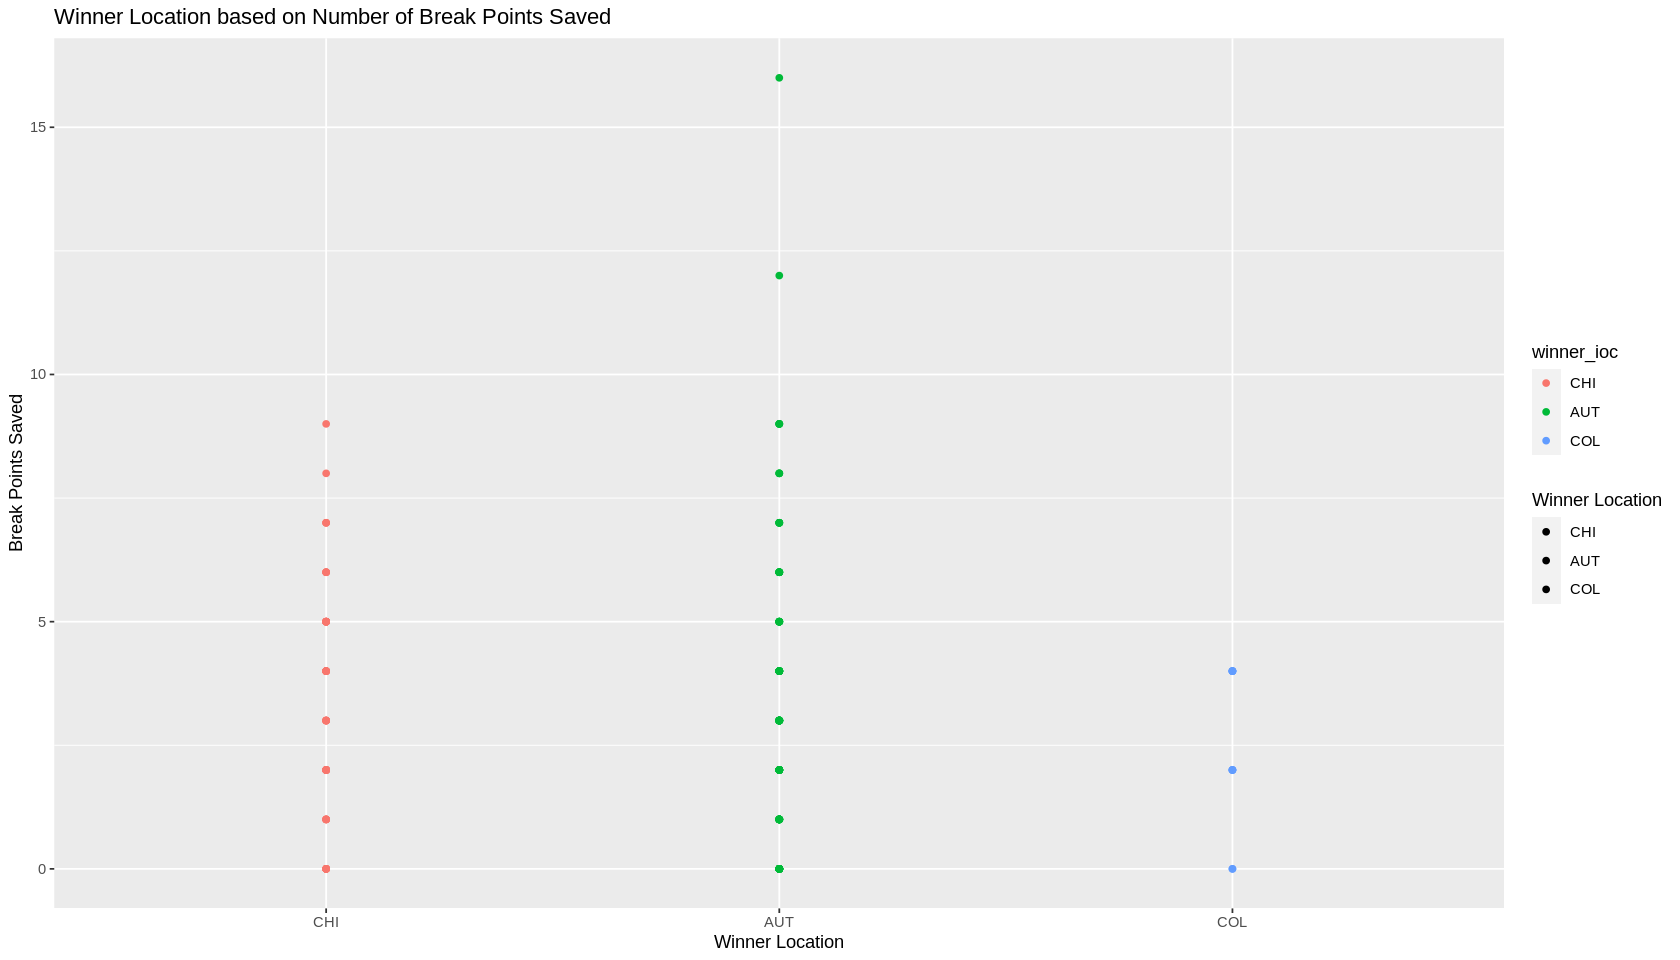

Warning message:
“Removed 3 rows containing missing values (geom_point).”


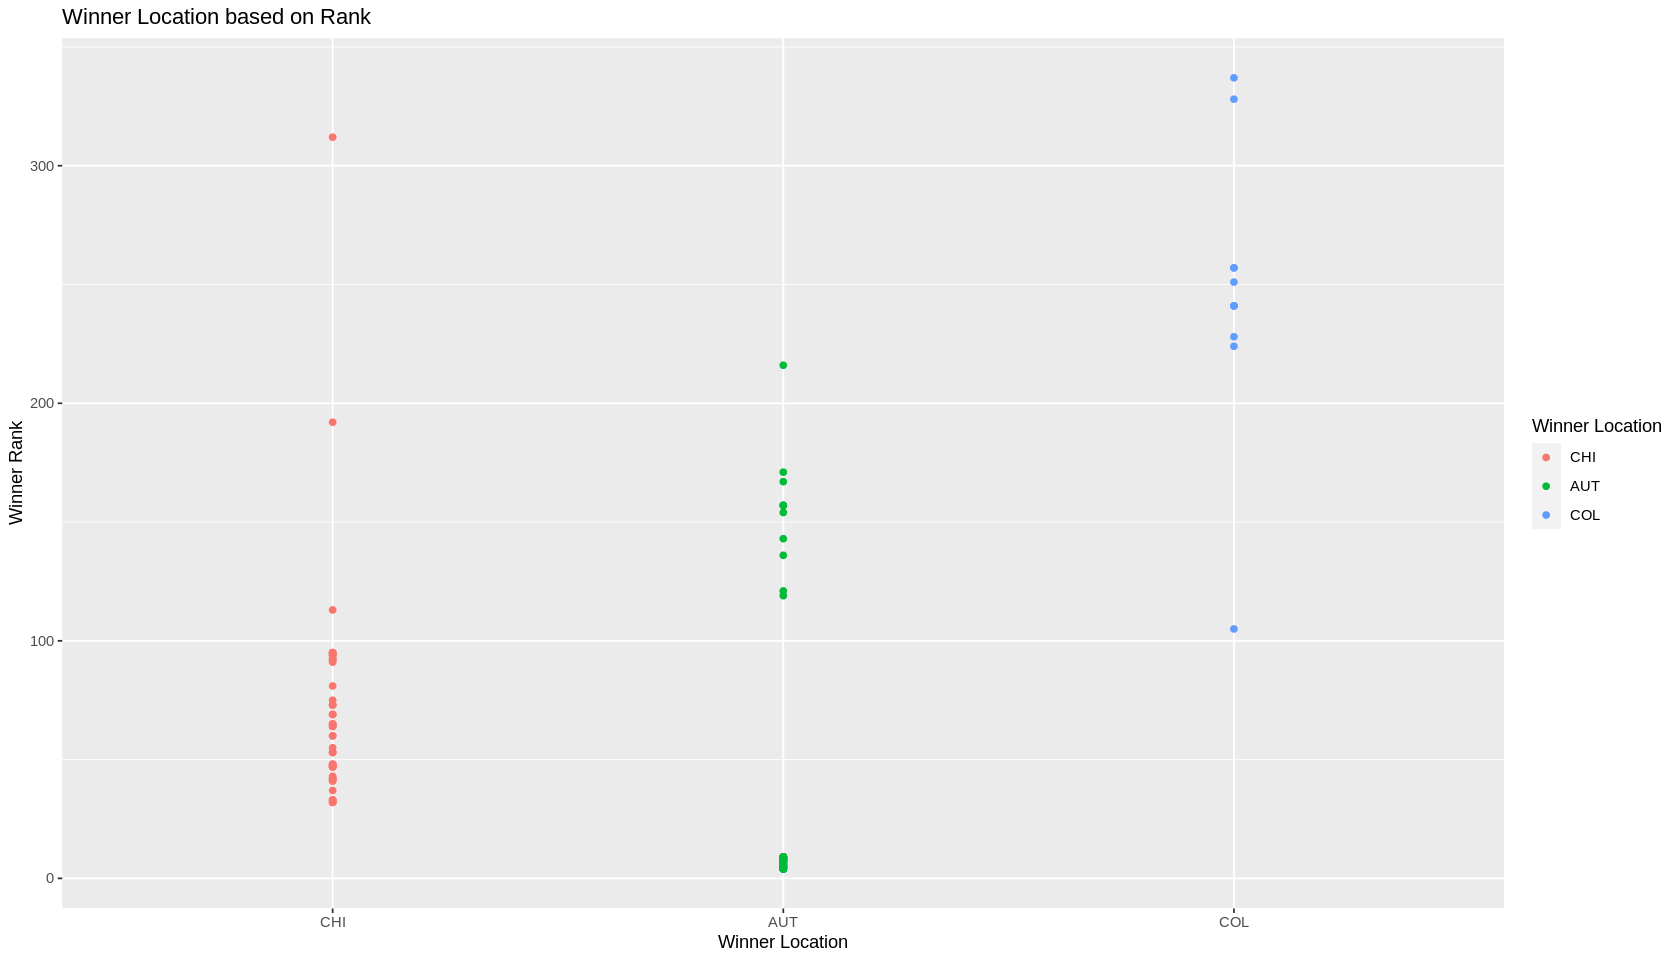

Warning message:
“Removed 3 rows containing missing values (geom_point).”


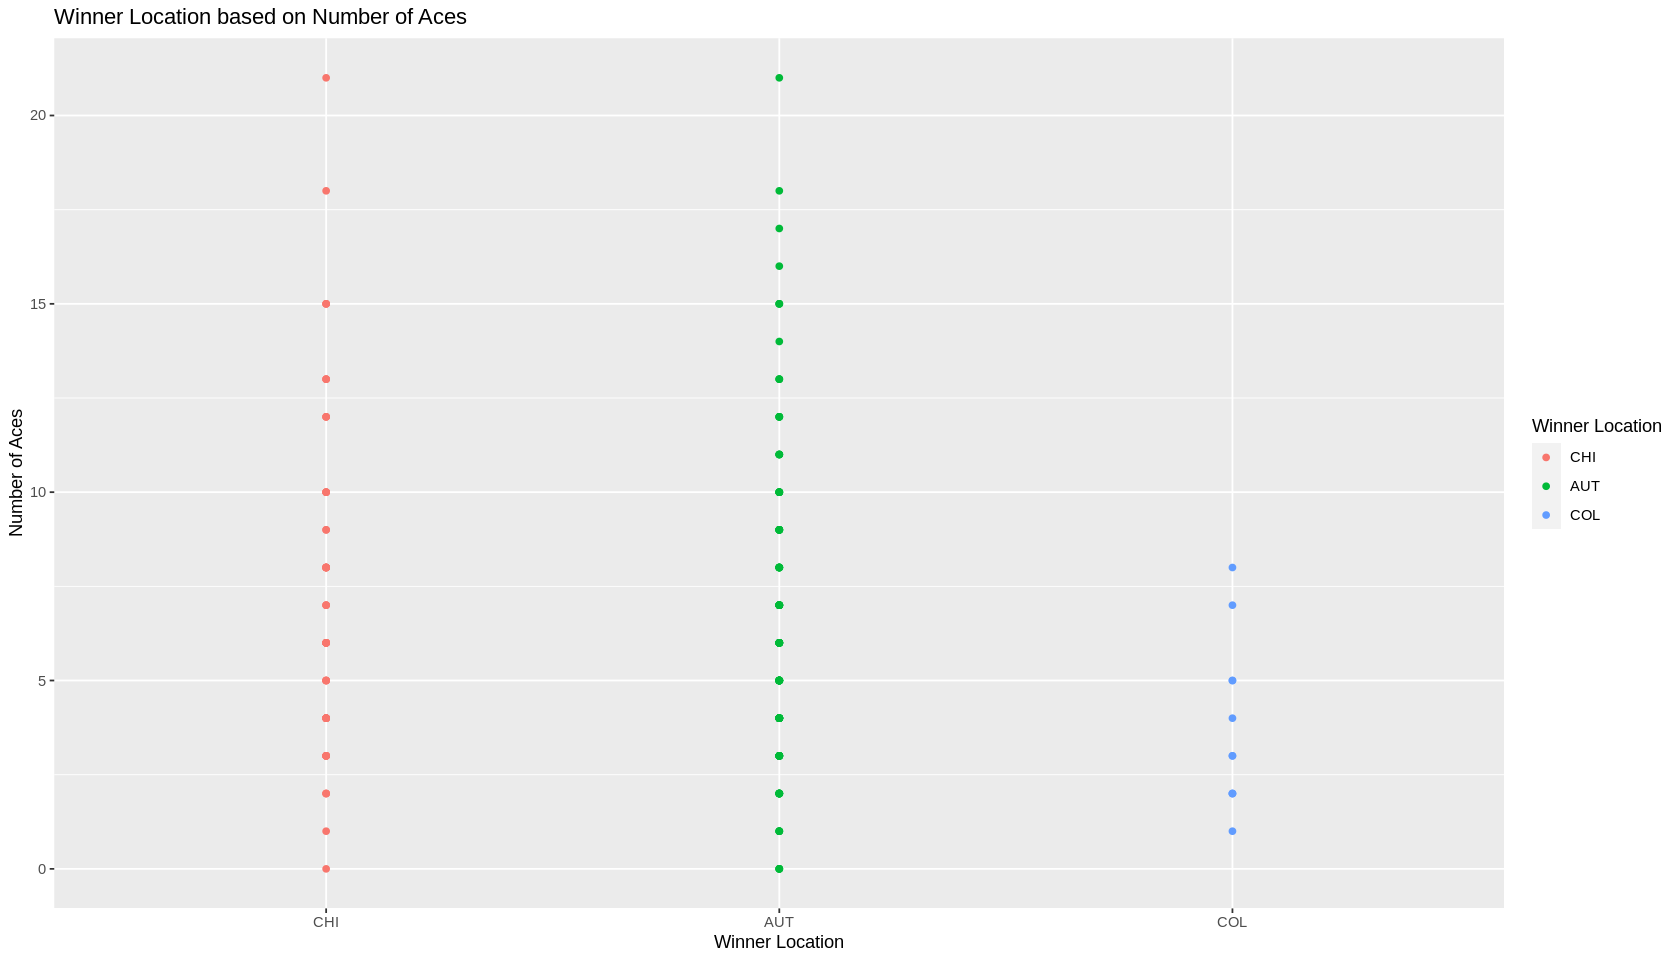

Warning message:
“Removed 3 rows containing missing values (geom_point).”


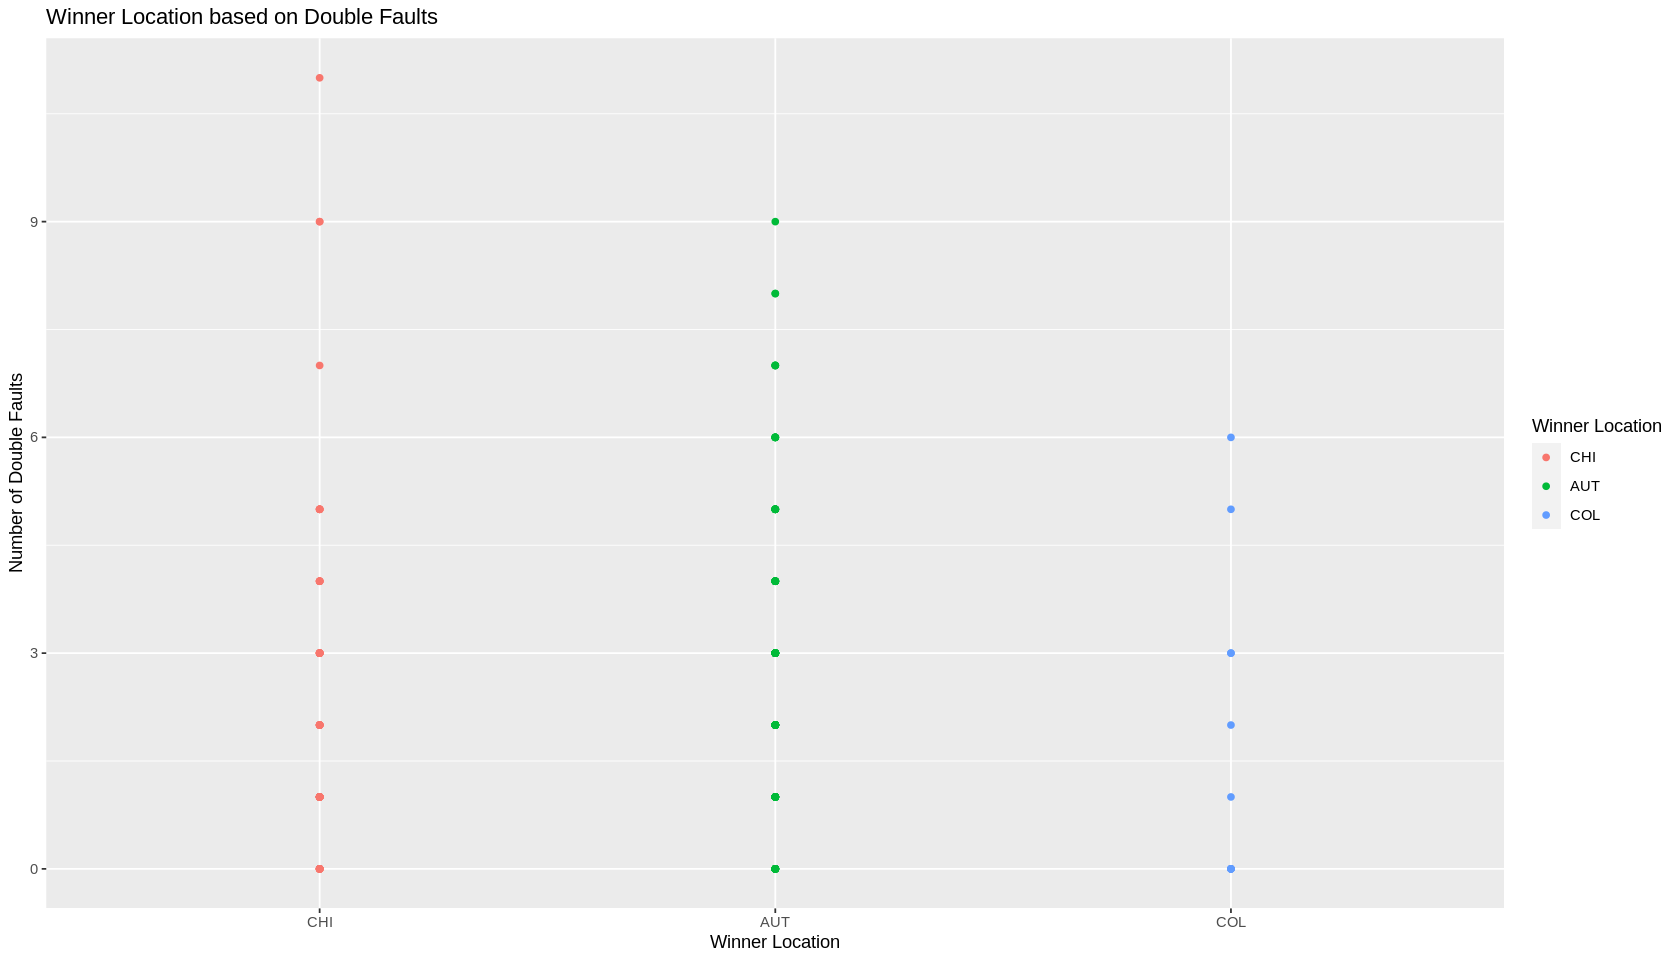

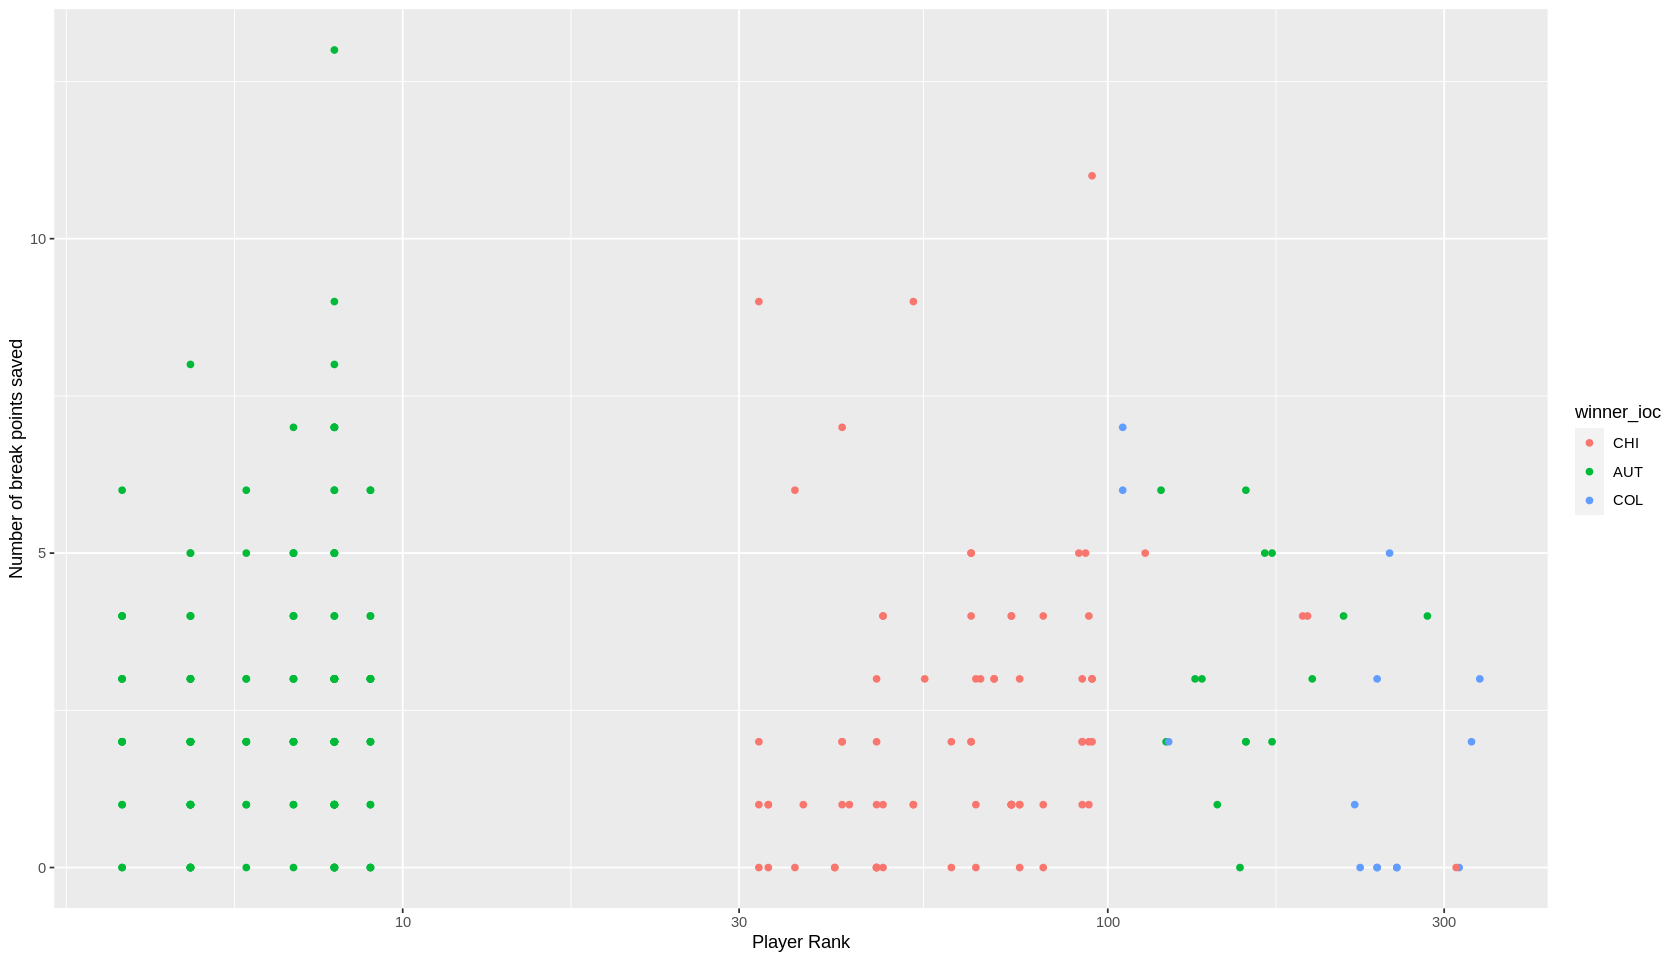

In [57]:
library(tidyverse)
library(cowplot)
library(scales)
library(repr)
library(dplyr)
library(tidyr)
library(tidymodels)

origin_data <- read_csv("atp2017-2019.csv") %>% 
    mutate(winner_ioc = as_factor(winner_ioc)) %>%
    mutate(loser_ioc = as_factor(loser_ioc))
data <- origin_data %>% filter(winner_ioc == "AUT" | winner_ioc == "CHI" | winner_ioc == "COL") %>%
    select(winner_ioc, winner_name, winner_age, winner_hand, winner_ht, w_ace, w_df, winner_rank, w_bpSaved, loser_ioc, loser_name, loser_age, loser_hand, loser_ht, l_ace, l_df, loser_rank, l_bpSaved)

set.seed(222)

data_split <- initial_split(data, prop = 0.75, strata = winner_ioc)
data_train <- training(data_split)
data_test <- testing(data_split)

bp_bar <- ggplot(data_train, aes(x = winner_ioc, y = w_bpSaved, fill = winner_ioc)) +
    geom_point(aes(colour = winner_ioc)) +
    labs(x = "Winner Location", y = "Break Points Saved", fill = "Winner Location") +
    ggtitle("Winner Location based on Number of Break Points Saved")

bp_bar

rank_bar <- ggplot(data_train, aes(x = winner_ioc, y = winner_rank, color = winner_ioc)) +
    geom_point(aes(colour = winner_ioc)) +
    labs(x = "Winner Location", y = "Winner Rank", color = "Winner Location") +
    ggtitle("Winner Location based on Rank")

rank_bar

ace_bar <- ggplot(data_train, aes(x = winner_ioc, y = w_ace, color = winner_ioc)) +
    geom_point(aes(colour = winner_ioc)) +
    labs(x = "Winner Location", y = "Number of Aces", color = "Winner Location") +
    ggtitle("Winner Location based on Number of Aces") 

ace_bar

df_bar <- ggplot(data_train, aes(x = winner_ioc, y = w_df, color = winner_ioc)) +
    geom_point(aes(colour = winner_ioc)) +
    labs(x = "Winner Location", y = "Number of Double Faults", color = "Winner Location") +
    ggtitle("Winner Location based on Double Faults") 

df_bar

first_plot <- data %>% ggplot(aes(x = winner_rank, y = w_df)) + 
         geom_point(aes(colour = winner_ioc)) + 
         xlab("Player Rank") +
         ylab("Number of break points saved") +
         scale_x_log10()
options(repr.plot.width = 14, repr.plot.height = 8)

first_plot

#second_plot <- data %>% ggplot(aes(x = w_ace, y = w_df)) + 
#         geom_point(aes(colour = winner_ioc)) + 
#         xlab("Number of aces") +
#         ylab("Number of double faults")
#plot_grid (first_plot, second_plot)


Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  tourney_id = col_character(),
  tourney_name = col_character(),
  surface = col_character(),
  tourney_level = col_character(),
  winner_seed = col_character(),
  winner_entry = col_character(),
  winner_name = col_character(),
  winner_hand = col_character(),
  winner_ioc = col_character(),
  loser_seed = col_character(),
  loser_entry = col_character(),
  loser_name = col_character(),
  loser_hand = col_character(),
  loser_ioc = col_character(),
  score = col_character(),
  round = col_character()
)

See spec(...) for full column specifications.

Warning message:
“Removed 3 rows containing missing values (geom_point).”


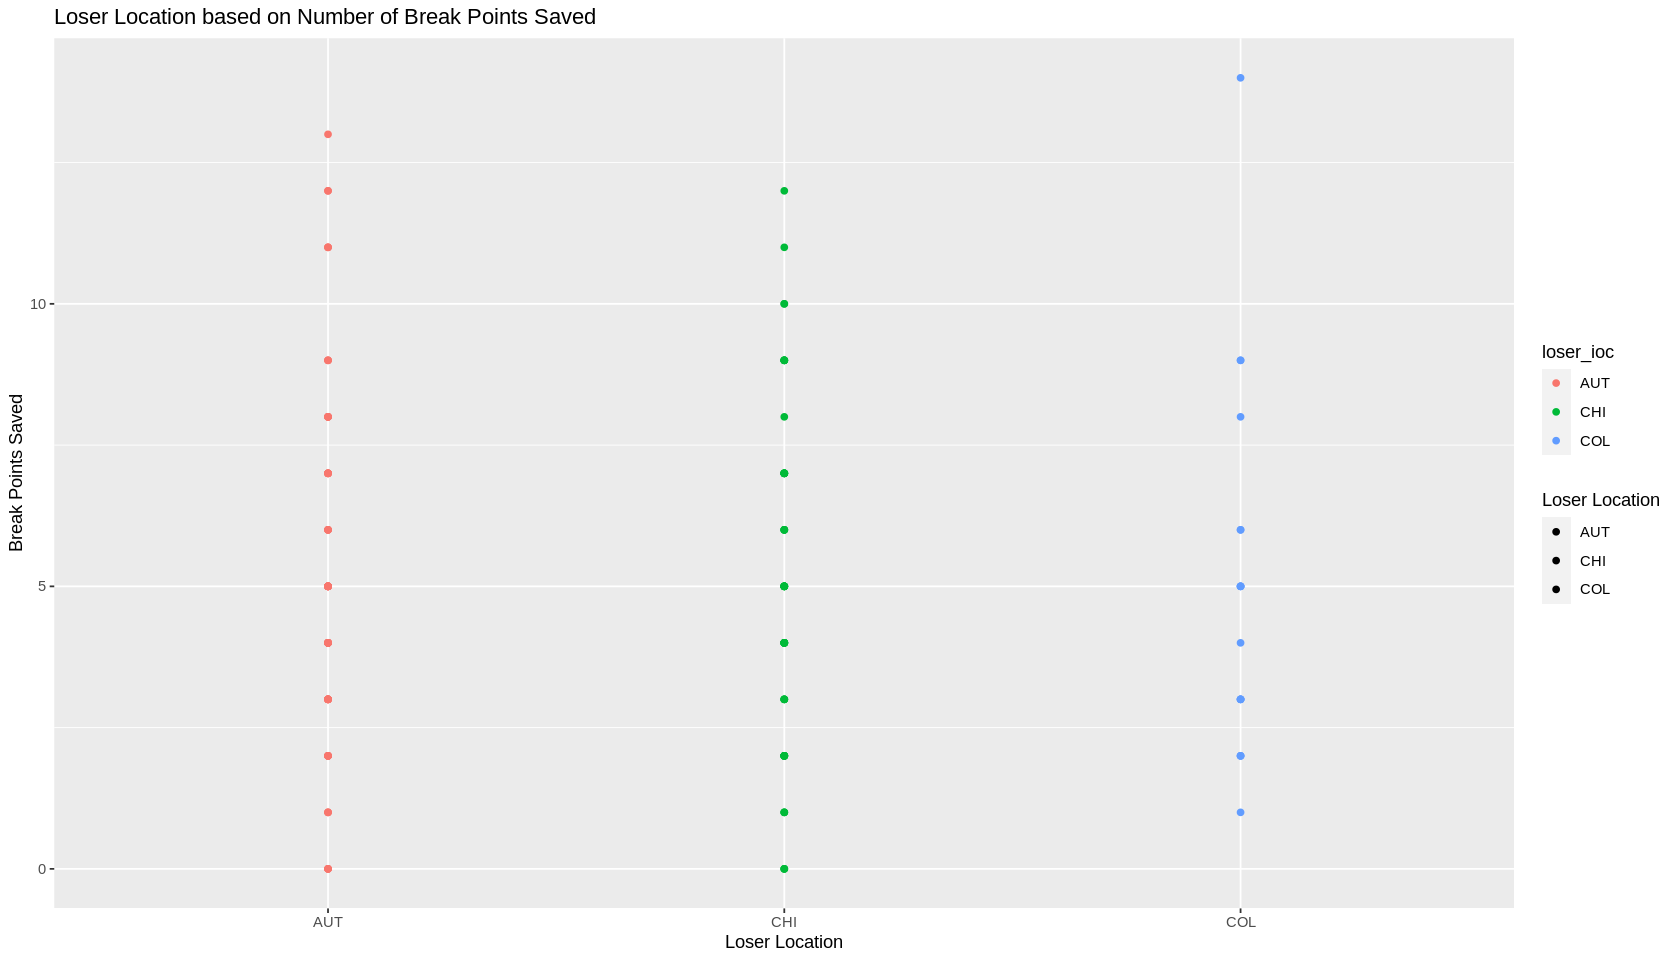

Warning message:
“Removed 3 rows containing missing values (geom_point).”


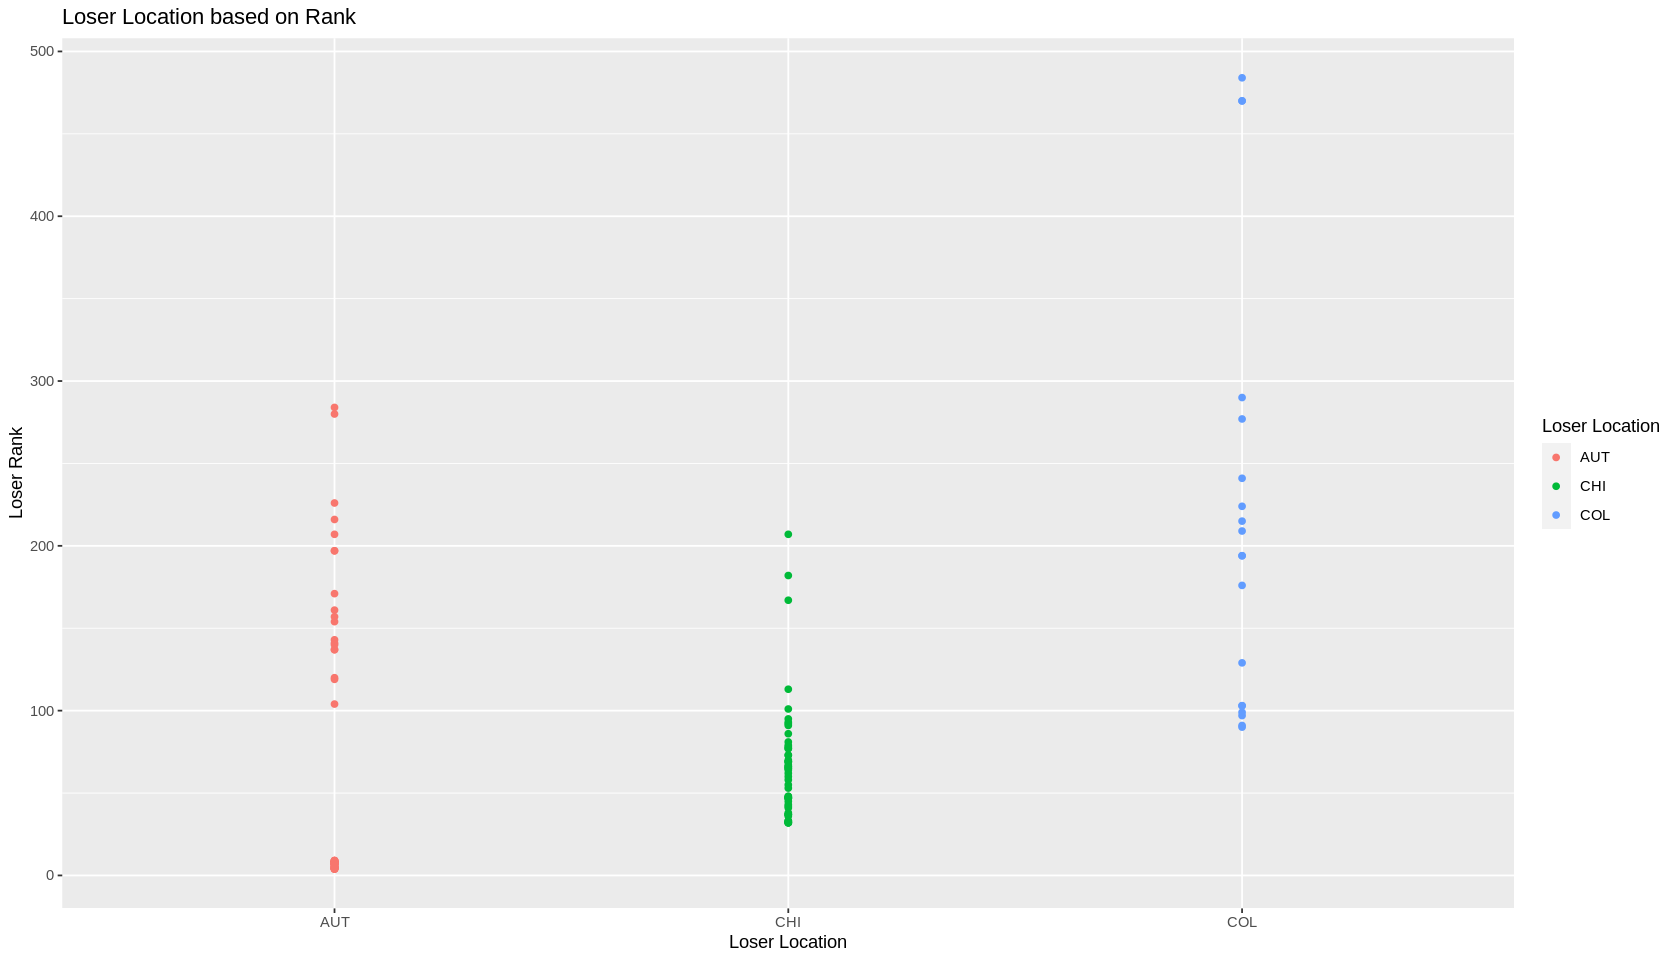

Warning message:
“Removed 3 rows containing missing values (geom_point).”


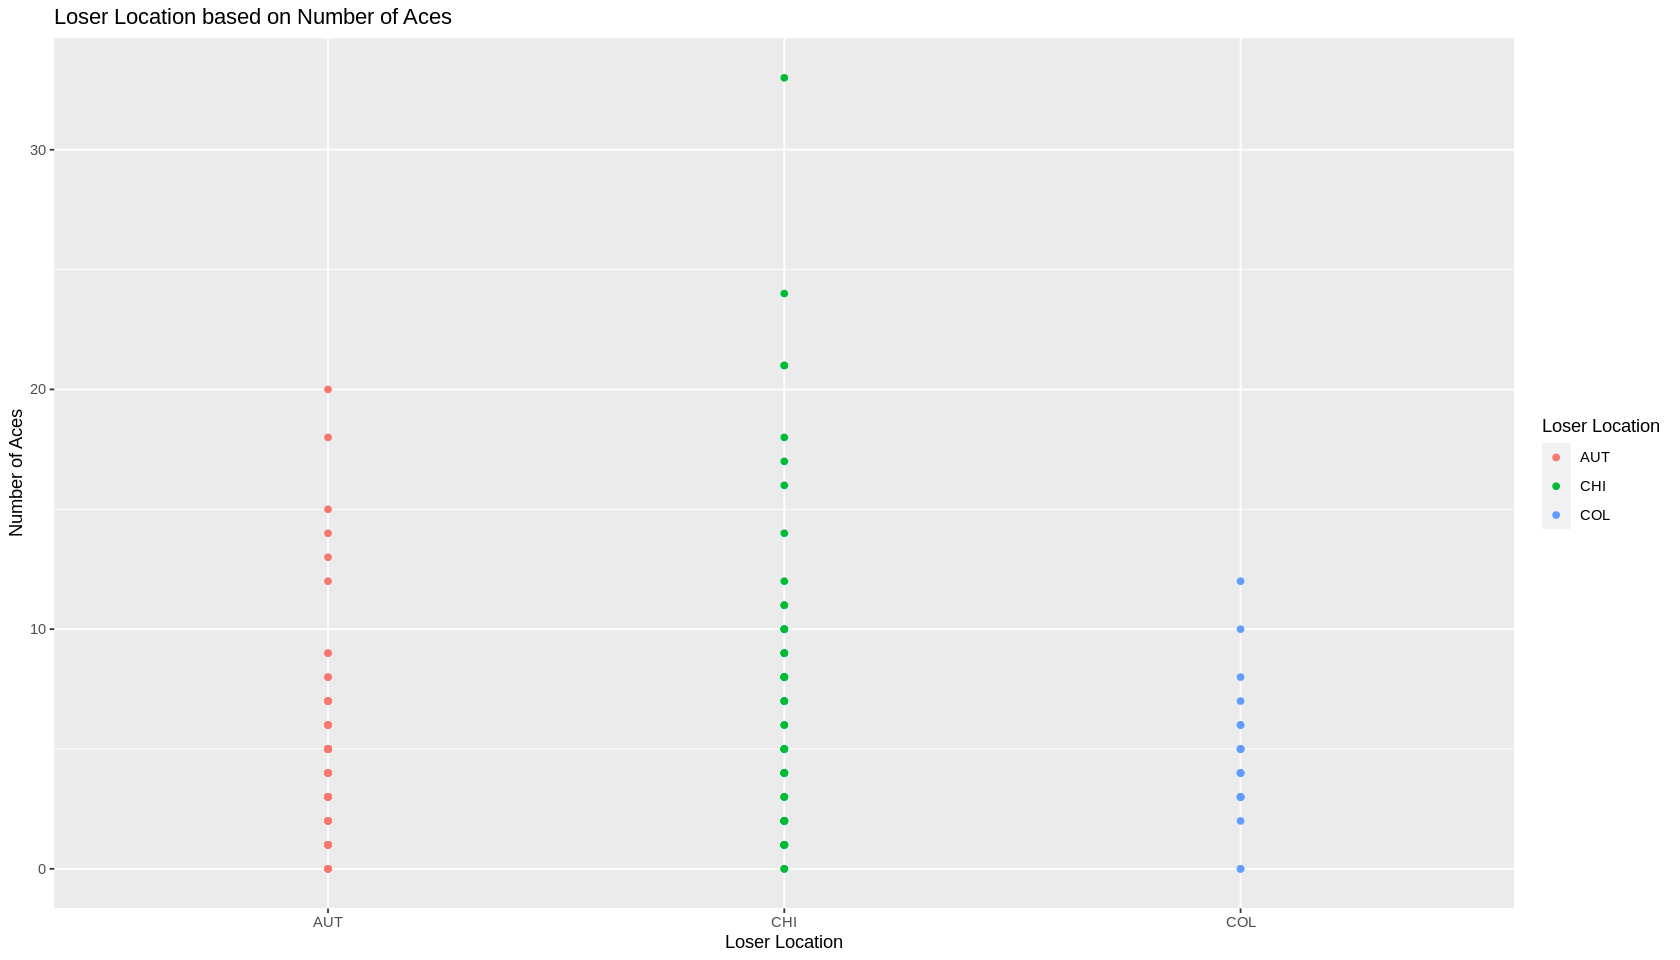

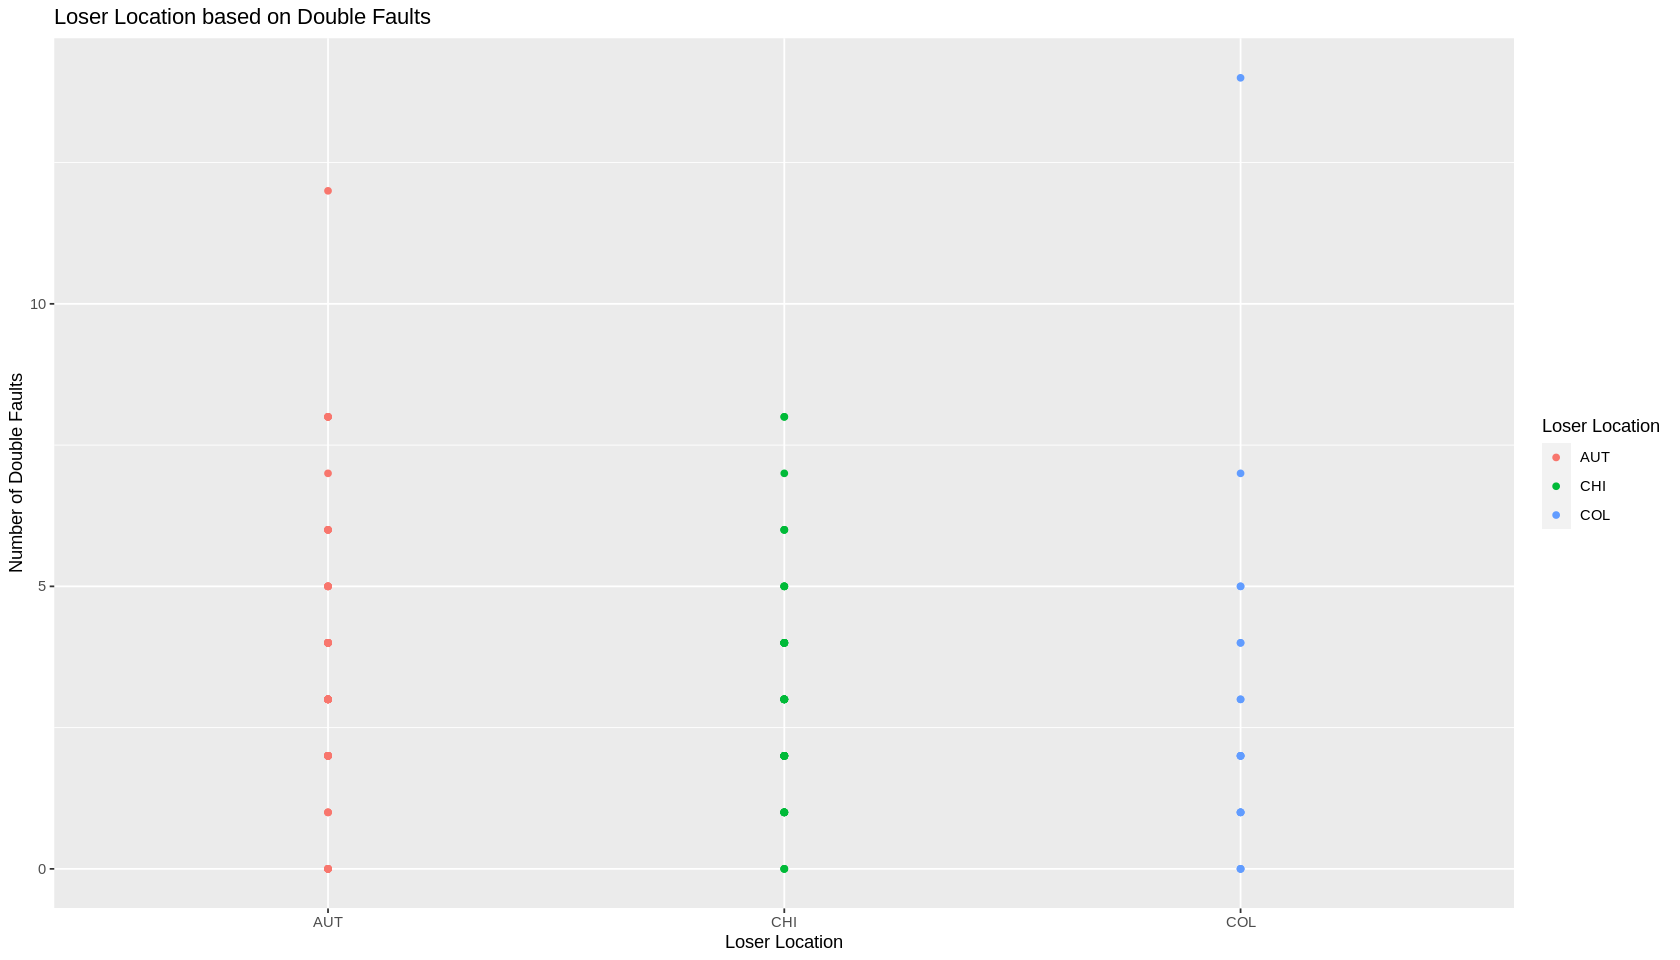

In [59]:
set.seed(222)

origin_data <- read_csv("atp2017-2019.csv") %>% 
    mutate(winner_ioc = as_factor(winner_ioc)) %>%
    mutate(loser_ioc = as_factor(loser_ioc))
loser_data <- origin_data %>% filter(loser_ioc == "AUT" | loser_ioc == "CHI" | loser_ioc == "COL")

loser_split <- initial_split(loser_data, prop = 0.75, strata = loser_ioc)
loser_train <- training(loser_split)
loser_test <- testing(loser_split)

l_bp_bar <- ggplot(loser_train, aes(x = loser_ioc, y = l_bpSaved, fill = loser_ioc)) +
    geom_point(aes(colour = loser_ioc)) +
    labs(x = "Loser Location", y = "Break Points Saved", fill = "Loser Location") +
    ggtitle("Loser Location based on Number of Break Points Saved")

l_bp_bar

l_rank_bar <- ggplot(loser_train, aes(x = loser_ioc, y = loser_rank, color = loser_ioc)) +
    geom_point(aes(colour = loser_ioc)) +
    labs(x = "Loser Location", y = "Loser Rank", color = "Loser Location") +
    ggtitle("Loser Location based on Rank")

l_rank_bar

l_ace_bar <- ggplot(loser_train, aes(x = loser_ioc, y = l_ace, color = loser_ioc)) +
    geom_point(aes(colour = loser_ioc)) +
    labs(x = "Loser Location", y = "Number of Aces", color = "Loser Location") +
    ggtitle("Loser Location based on Number of Aces") 

l_ace_bar

l_df_bar <- ggplot(loser_train, aes(x = loser_ioc, y = l_df, color = loser_ioc)) +
    geom_point(aes(colour = loser_ioc)) +
    labs(x = "Loser Location", y = "Number of Double Faults", color = "Loser Location") +
    ggtitle("Loser Location based on Double Faults") 

l_df_bar

## Expected Outcome and significance

We expect to find a correlation between the chosen variables and the country, thus allowing a player’s country to be predicted based on the stats. This would help us understand the influence that funding and training techniques in a particular country have on the performance of the individual player.

Future questions could be why a specific country is dominating tennis and whether it is because their government gives more funds for their training. Also, it can be further studied if the variables used and the location of each country has a certain causal effect. 
